In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Probability Density Functions

Probability density functions (PDFs) are another of our commonly used visualizations to show and explore data. 

Going forward, the PDF is probably the most generally useful of the assorted distribution graphs, especially with continuous data. All of them do the same thing, but as we've seen there are some scenarios where the histogram looks weird and isn't useful. The PDF will pretty much always give us a good idea of the distribution. 

## Discreet and Continuous

The relationship between the discreet and continuous distributions is important because we sometimes need/want to transform our data between the two. 

One example from real life is your GPA - when you do assignments/exams, you end up with a raw percentage grade which is continuous. When this is converted to a letter scale (A, B, etc...), that letter scale is discreet - there's only a selection of possible values (b-,b,b+, etc...). This is binning. We take a continuous varaible and create a discreet variable from it - or more literally, we put the continuous values into a bin. 

The other example is when your GPA is caclulated - those discreet values are assigned numbers on a 1-4 scale, then averaged together creating a new continuous value - your GPA.

One place where this is commonly used is lending and credit scores. Having a credit score of 752 vs 764 makes no difference, you're placed in a category of "excellent", "very good", etc...


In [2]:
#Load data
df = pd.read_csv("data/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Winning is Binning

Below is an example of how binning works that you can walk through. The logic is fairly simple, we see what bucket our numerical value falls into, then give it a label for that group. Here we are giving credit scores their label as though someone was applying for credit. 

<b>Note:</b> I have commented out some of my troubleshooting print statements, try uncommenting and executing the loop, and take a look at what gets printed. If your loop was not delivering what you want, would this be useful in finding the issue?

In [3]:
#Create credit-score bucket.
df["grade"] = " "
scoreCol = df.columns.get_loc("fico")
gradeCol = df.columns.get_loc("grade")

for i in range(len(df)) :
    if df.iloc[i,scoreCol] < 580:
        #print("Less than 580-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "subprime"
    elif df.iloc[i,scoreCol] < 670:
        #print("580-670-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "fair"
    elif df.iloc[i,scoreCol] < 740:
        #print("670-740-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "good"
    elif df.iloc[i,scoreCol] < 800:
        #print("740-800-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "very good"
    else:
        #print("800+-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "excellent"
#print(str(scoreCol)+ " "+ str(gradeCol))
df.head(25)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,grade
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fair
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,good
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,fair
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,good
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,good
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,good


##### Manual Binning via a Loop - Details

What we have above is an example of using a simple-ish loop, let's look at the parts in detail:
<ul>
<li> The "for" part says, "do what's in this loop once for every index (the position in the dataframe - row 1, 2, 3, 4, etc). Each time the stuff is executed, make the variable 'i' be the row number". 
<li> The series of if statements checks if the fico score value is less than a series of cutoffs. If the fico score meets any of the criteria, it gets that label, the current execution of the loop ends, and we progress to the next row. 
<li> The iloc part is not the general way we want to use a dataframe, it is grabbing data from the df based on the index values - the row and column numbers. The 'i' is the row number, it starts at 0 and increases with each execution of the loop. The scoreCol value is calculated above, it is just the column number of the "fico" column (6 for me). The whole statement effectively grabs the "cell" at that location, like an Excel cell or a battleship hit. 
<li> This repeats, with 'i' incrementing until we reach the end. 
</ul>

#### Built in Binning

In reality, we can use premade functions to do the work for us. Here we can define the cutoff limits and let the computer figure our the rest. 

In [4]:
#In generic cases, we can automate this:
bins = np.arange(580, 860, 60) #or
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean())

1 612 1341 60231.432107263354
2 672 6007 67593.95498610557
3 742 2085 74025.49061873481
4 802 145 96581.13203052751


In [5]:
#Graph
#hist2 = thinkstats2.Hist(round(df["fico"], -1))
hist2 = thinkstats2.Hist(df["fico"])
pmf2 = thinkstats2.Pmf(df["fico"])
cdf2 = thinkstats2.Cdf(df["fico"])

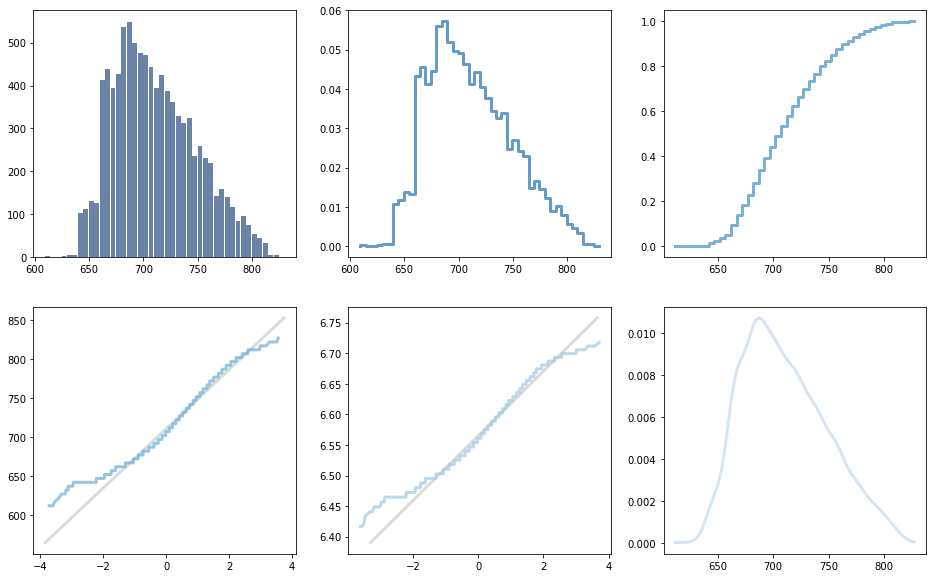

In [6]:
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df["fico"])
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df["fico"]))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df["fico"]) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

#### Multiple Plots on a Grid

In the examples both above and below we have a grid of multiple graphs. Each one is done in a different way. 

In the thinkplot stuff we have a helper called PrePlot, which we can use to define the size of the grid, along with the subPlot function that can basically "aim" the next chart into the desired slot. 

In the seaborn stuff below, we have a grid using pyplot subplots. Here we define a set of sublots, then in each individual plot we assign it a slot. 

Both of these are built upon the foundations of pyplot (which is part of matplotlib), so there is often, but not always interoperability. The method below is farily generic and will work in many places, with many graphs. Note that (for reasons we really don't care about, it has to do with if the function only provides an "image" of a graph, or an entire "object" of a graph) there are some scenarios that making a grid like this won't work. The easiest way to confirm is to Google, "seaborn [graphtype] subplots" and there will be several examples (usually stackoverflow ones have good explained examples) that can normally be easily adapted. There are a bunch of ways to do this, and a bunch of semi-related garphing libraries and types of graphs, so there isn't a "one true answer". 

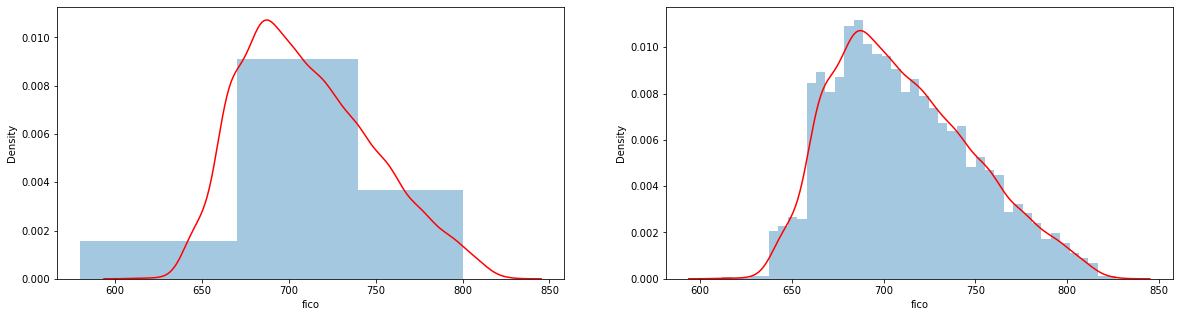

In [7]:
#We can use seaborn as well

plt.rcParams["figure.figsize"] = (20,5) #makes the default size larger. 
#Everything after the comma is optional. 
fig, ax = plt.subplots(1,2)
sns.distplot(df["fico"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
sns.distplot(df["fico"], bins=bins, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

### KDE and Histogram

As above - the KDE produces a smoothed function, and approximates the distribution of the histogram. Especially when the volume of data becomes large, a KDE may be a more useful visualization of a distribution. 

The smaller those bins get, the closer of an approximation. The smoothing factor accounts for 'noise' - e.g. around 750ish. On the whole, this delivers a distribution shape that isn't impacted directly by sharp ups and downs at certain points on the distribution, like a histogram is. For generalizing from a sample to a population, this is useful...


### Skewness

![Skew](images/skew.png)

Skewness. We can visually see the skew - this one is right skewed a bit - the right side is "stretched" out a bit more. Skew is both easy to see and easy to calculate, we also have a quick rule of thumb that we can figure out with basic satistics:
<ul>
<li>If the mean is greater than the median, the distribution is positively skewed.
<li>If the mean is less than the median, the distribution is negatively skewed.
</ul>

The value of the skew can be calculated with a function called Pearson Median Skewness, which is defined as:

$$ Skew = \frac{3(X_i - \mu)}{\sigma} $$

The values for skew don't have any specific meaning, the larger magnitude it is, the larger the skew. As a rule of thumb, values greater than 1 are highly skewed. 

We can verify with caclculations...

In [8]:
#Skew
skw = thinkstats2.PearsonMedianSkewness(df["fico"])
print(df["fico"].mean())
print(df["fico"].median())
print(skw)

710.8463144706619
707.0
0.30390788935426843


We can show it a little more clearly on the graph by adding some reference lines for mean and median. We can see that the mean is now greater than the median. 

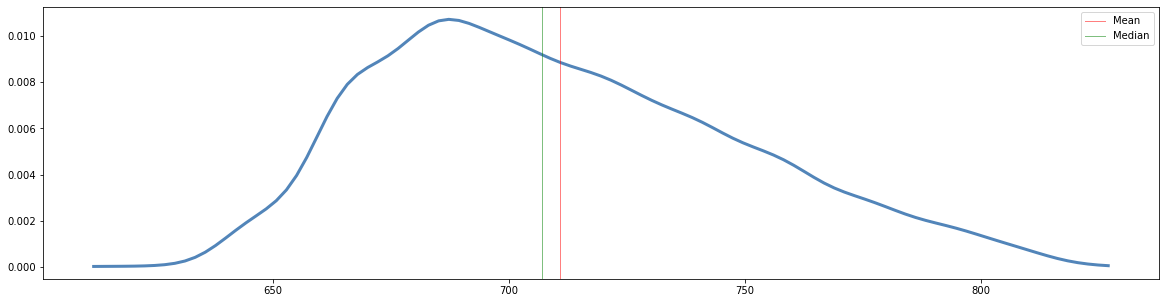

In [9]:
thinkplot.PrePlot(1)
thinkplot.Pdf(pdf)
thinkplot.axvline(df["fico"].mean(), color="Red", label="Mean")
thinkplot.axvline(df["fico"].median(), color="Green", label="Median")
thinkplot.Config()

## Income

We can explore a different varaible similarly - income. 

We are given the income in log format. Why might that be? Can you investigate a little, and add normal income to the dataframe?

In [10]:
#create a new column - income. This should show the regular income, not log transformed. 
df["income"] = np.exp(df["log.annual.inc"])
df["income"].describe()

count    9.578000e+03
mean     6.840203e+04
std      6.122753e+04
min      1.896000e+03
25%      3.850000e+04
50%      5.576400e+04
75%      8.012100e+04
max      2.039784e+06
Name: income, dtype: float64

### Exercise #1 - Create a Function

Try to make a function that prints all the 6 graphs we made above when provided with data. 

In [11]:
# Challenge - try to create a function that makes the suite of 6 graphs above.
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(data)
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

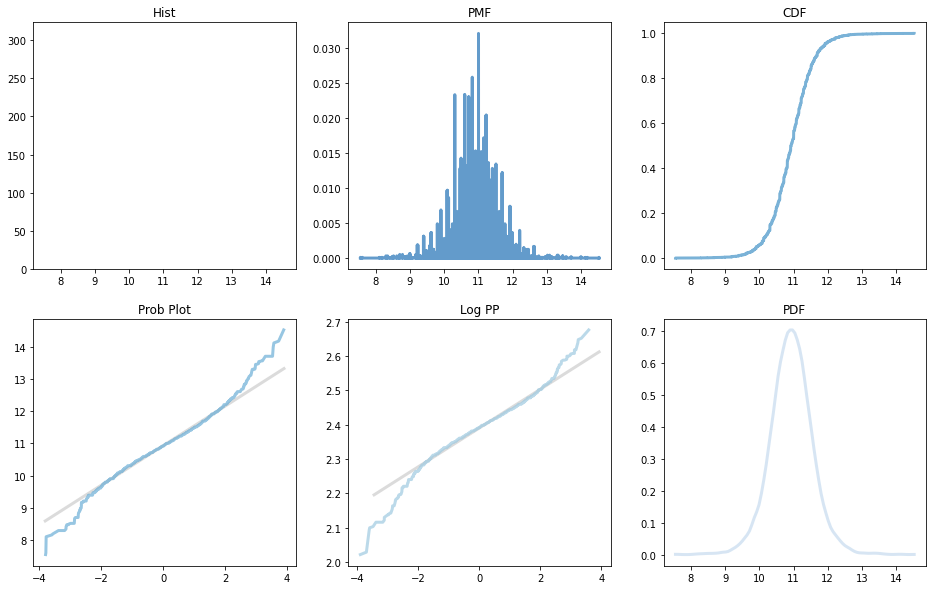

In [12]:
# Draw graphs
bigGraph(df, "log.annual.inc")

### Exercise #2: Establish Tax Rates

Try to use the data - break into groups of marginal tax rates:
<ul>
<li>15% on the first $49,020 of taxable income, plus
<li>20.5% on the next $49,020 of taxable income (on the portion of taxable income over 49,020 up to $98,040), plus
<li>26% on the next $53,939 of taxable income (on the portion of taxable income over $98,040 up to $151,978), plus
<li>29% on the next $64,533 of taxable income (on the portion of taxable income over 151,978 up to $216,511), plus
<li>33% of taxable income over $216,511
</ul>

<b>Generate bins for each tax bracket</b>

In [13]:
# Generate bins for each tax bracket
incBins = [49020, 98040, 151978, 216511]
ind = np.digitize(df["income"], incBins)
incGroups = df.groupby(ind)

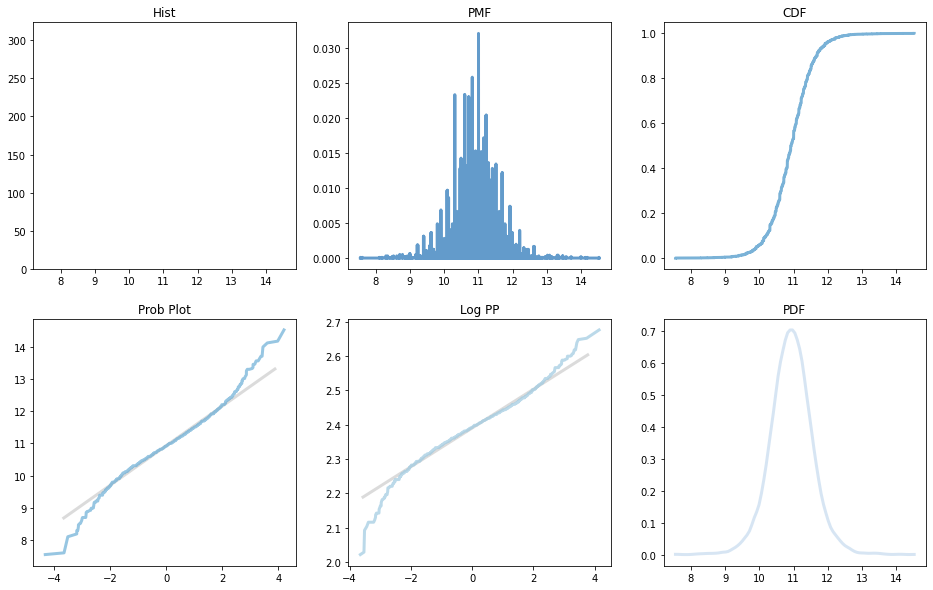

In [14]:
#Create the 6 graph set of graphs for original log income
bigGraph(df, "log.annual.inc")

<b>Use the data to estimate the number of people in each tax bracket</b>

Try to look through the bins, if you can. See the solution for a hint, if needed. 

In [15]:
for i, group in incGroups:
    print(i, len(group), group["income"].mean())

0 3842 33676.13357878737
1 4206 68377.60314278367
2 1096 118291.30739083061
3 261 179094.59077441762
4 173 357131.7053245144


<b>Use the cdf to estimate the number of people who earn Teacher Money - lowest: 59,357, highest: 101,162</b>

In [16]:
cdfInc = thinkstats2.Cdf(df["income"])
cdfInc.Prob(59357), cdfInc.Prob(101162)

(0.531008561286281, 0.8592608060137816)

<b>Create a KDE showing the distributiion of income. Try both log income, and raw income. </b>

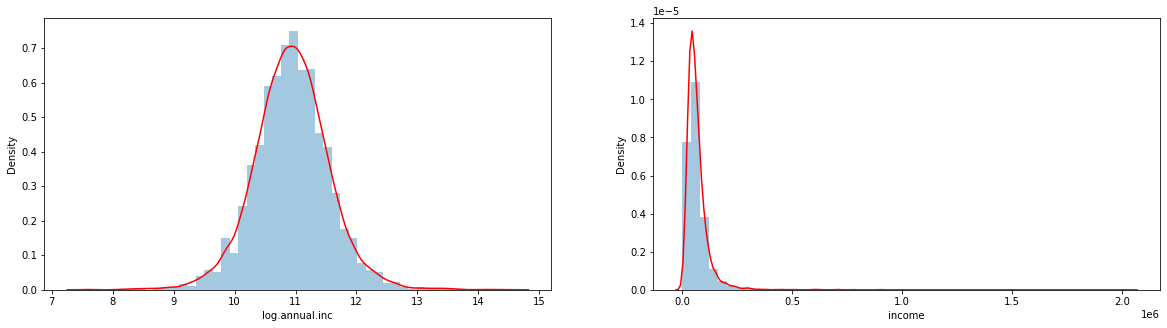

In [17]:
fig, ax = plt.subplots(1,2)
sns.distplot(df["log.annual.inc"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
sns.distplot(df["income"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
plt.show()

## Exercise #2: Tax Function

Try this! 

In [18]:
#Challenge - Create a function that takes an income and returns a tax bill, and marginal tax rate:
def muhTaxes(income):
    
    return taxbill, margRate

In [19]:
# When calling that function, you can do something like this to get the results:
# tax_bill, marginal_rate = muhTaxes(amount_i_earned)
# print("Tax bill: ", tax_bill)
# print("Marginal rate:", marginal_rate)

## So... Why a Log?

Think quickly - we have both the log and non-log data (there's just a math operation that differs between them, so we can always translate - or transform - back and forth), why bother with the log? 

We are ultimately concerned with using our data to draw inference, which means we are introducing some assumptions. Suppose we want to use the data to estimate the distance between the lowest and highest quintiles of income. If we only care about the sample's data, we can just count, no transformation needed. If we are attempting to generalize from our sample to the population (as we will soon), using the normal distribution allows us to use all of the things that are built to deal with normal distributions - in this case slicing segments of the data. Similarly, when we want to do tests to measure things about our data (such as hypothesis tests), many of those tests are created for normal data specifically. 

In general, we want to make data "as easy as possible to analyze", and making data normal (or sometimes transforming it in different ways, like normalization), often makes it easier. So we do it. 